# Webscrapping stock data


In [1]:
# Necessary libraries
import yfinance as yf
import pandas as pd


import json

# Apple

In [2]:
# Ticker module: Used to get securities meta data 

apple = yf.Ticker('AAPL')

## Price

In [3]:
# Share price
apple_price = apple.history(period='max')
apple_price.reset_index(inplace=True)


In [4]:
apple_price

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
10841,2023-12-13 00:00:00-05:00,195.089996,198.000000,194.850006,197.960007,70404200,0.0,0.0
10842,2023-12-14 00:00:00-05:00,198.020004,199.619995,196.160004,198.110001,66831600,0.0,0.0
10843,2023-12-15 00:00:00-05:00,197.529999,198.399994,197.000000,197.570007,128256700,0.0,0.0
10844,2023-12-18 00:00:00-05:00,196.089996,196.630005,194.389999,195.889999,55751900,0.0,0.0


<Axes: xlabel='Date'>

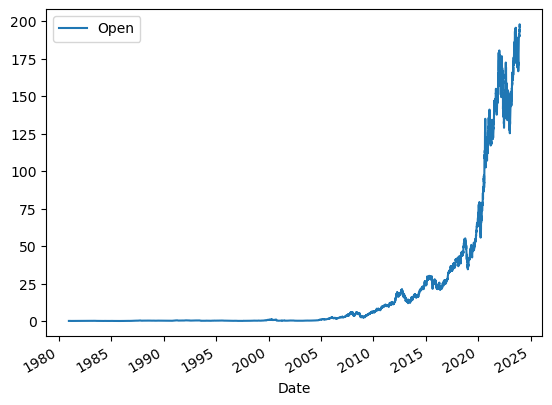

In [5]:
apple_price.plot(x='Date',y='Open')

## Dividends

In [6]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
Name: Dividends, Length: 81, dtype: float64

<Axes: xlabel='Date'>

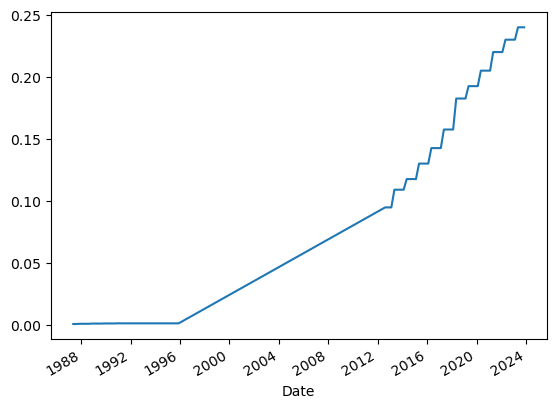

In [7]:
apple.dividends.plot()

# AMD

In [8]:
AMD = yf.Ticker('AMD')


In [9]:
amd_inf = pd.DataFrame(list(AMD.info.items()),columns=['atributes','values'])
amd_inf

,atributes,values
0,address1,2485 Augustine Drive
1,city,Santa Clara
2,state,CA
3,zip,95054
4,country,United States
...,...,...
122,grossMargins,0.50319
123,ebitdaMargins,0.13776
124,operatingMargins,0.03862
125,financialCurrency,USD


In [10]:
amd_inf.loc[amd_inf['atributes']=='country']

,atributes,values
4,country,United States


In [11]:
amd_inf.loc[amd_inf['atributes']=='sector']

,atributes,values
10,sector,Technology


<Axes: xlabel='Date'>

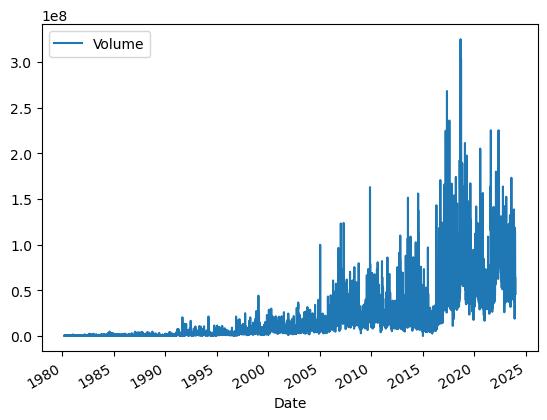

In [12]:
amd_hist = AMD.history(period='max').reset_index()
amd_hist

amd_vol= amd_hist[['Volume','Date']]
amd_vol.plot(x='Date',y='Volume')



In [13]:
amd_vol

,Volume,Date
0,219600,1980-03-17 00:00:00-05:00
1,727200,1980-03-18 00:00:00-05:00
2,295200,1980-03-19 00:00:00-05:00
3,159600,1980-03-20 00:00:00-05:00
4,130800,1980-03-21 00:00:00-05:00
...,...,...
11029,70651600,2023-12-13 00:00:00-05:00
11030,76115200,2023-12-14 00:00:00-05:00
11031,70178600,2023-12-15 00:00:00-05:00
11032,45199500,2023-12-18 00:00:00-05:00


In [14]:
# !pip install requests
# !pip install html5lib
# !pip install request
# !pip install lxml


In [15]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings

In [16]:
# To ignore warnings
warnings.filterwarnings('ignore',category=FutureWarning)

# Using webscraping to extract netflix stock data
## BeautifulSoup method

Step 1. Make the request 

In [17]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html'
data = requests.get(url).text
data

'<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><

Step 2. Parse the HTML

In [20]:
sopita = BeautifulSoup(data, 'html5lib')

In [23]:
# Initialize the columns we are interested in
netflix_data = pd.DataFrame(columns=['Date','Open','High','Low','Close','adj_close','Volume'])

In [29]:
# Extract the data
for row in sopita.find('tbody').find_all('tr'):
    col = row.find_all('td')
    Date = col[0].text
    Open = col[1].text
    High = col[2].text
    Low = col[3].text
    Close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    # Append the data to the DF
    netflix_data = netflix_data.append({'Date':Date,'Open':Open,'High':High,'Low':Low,'Close':Close,'adj_close':adj_close,'Volume':volume}, ignore_index=True)

netflix_data

,Date,Open,High,Low,Close,adj_close,Volume
0,"Sep 01, 2015",109.35,111.24,93.55,103.26,103.26,"497,401,200"
1,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,"78,560,600"
2,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,"66,927,600"
3,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,"111,573,300"
4,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,"90,183,900"
...,...,...,...,...,...,...,...
66,"Jan 01, 2016",109.00,122.18,90.11,91.84,91.84,"488,193,200"
67,"Dec 01, 2015",124.47,133.27,113.85,114.38,114.38,"319,939,200"
68,"Nov 01, 2015",109.20,126.60,101.86,123.33,123.33,"320,321,800"
69,"Oct 01, 2015",102.91,115.83,96.26,108.38,108.38,"446,204,400"


## Alternative method using pandas

In [30]:
netflix_pandas = pd.read_html(url)

In [33]:
net_pan_tabla = netflix_pandas[0]
net_pan_tabla

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300
...,...,...,...,...,...,...,...
66,"Dec 01, 2015",124.47,133.27,113.85,114.38,114.38,319939200
67,"Nov 01, 2015",109.20,126.60,101.86,123.33,123.33,320321800
68,"Oct 01, 2015",102.91,115.83,96.26,108.38,108.38,446204400
69,"Sep 01, 2015",109.35,111.24,93.55,103.26,103.26,497401200


## Amazon stock price

In [38]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html'
data2 = requests.get(url).text
sopita_amazing = BeautifulSoup(data2, 'html5lib')


amaz = pd.DataFrame(columns=['Date','Open','High','Low','Close','adj_close','Volume'])

# Extract the data
for row in sopita_amazing.find('tbody').find_all('tr'):
    col = row.find_all('td')
    Date = col[0].text
    Open = col[1].text
    High = col[2].text
    Low = col[3].text
    Close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    # Append the data to the DF
    amaz = amaz.append({'Date':Date,'Open':Open,'High':High,'Low':Low,'Close':Close,'adj_close':adj_close,'Volume':volume}, ignore_index=True)

amaz

,Date,Open,High,Low,Close,adj_close,Volume
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","3,206.20","71,528,900"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","3,256.93","77,556,200"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","3,168.04","90,810,500"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","3,036.15","116,226,100"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","3,148.73","115,899,300"
...,...,...,...,...,...,...,...
56,"May 01, 2016",663.92,724.23,656.00,722.79,722.79,"90,614,500"
57,"Apr 01, 2016",590.49,669.98,585.25,659.59,659.59,"78,464,200"
58,"Mar 01, 2016",556.29,603.24,538.58,593.64,593.64,"94,009,500"
59,"Feb 01, 2016",578.15,581.80,474.00,552.52,552.52,"124,144,800"


In [91]:
# !pip install plotly
# !pip installnbformat
# import plotly.graph as go
import plotly.graph_objects as go

from plotly.subplots import make_subplots

In [92]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [103]:
# Q1
# Get tesla information
tesla = yf.Ticker('TSLA')

# Get the max info
tesla_h = tesla.history(period='max').reset_index()
tesla_h.head(5)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [104]:
# Q2
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text
data = BeautifulSoup(html_data, 'html5lib')



In [106]:
tesla_revenue = pd.read_html(url)[0]

tesla_revenue2= tesla_revenue.rename(columns=
    {str(tesla_revenue.columns[0]):'Date',str(tesla_revenue.columns[1]):'Revenue'})
# tesla_revenue2

tesla_revenue2['Revenue'] = tesla_revenue2['Revenue'].str.replace(',|\$','')
tesla_revenue2.dropna(inplace=True)
tesla_revenue2 = tesla_revenue2[tesla_revenue2['Revenue']!='']
tesla_revenue2['Revenue'] = (tesla_revenue2['Revenue']).astype(int)
tesla_revenue2['Date'] = pd.to_datetime(tesla_revenue2['Date'], format='%Y')
tesla_revenue2.tail()


,Date,Revenue
8,2013-01-01,2013
9,2012-01-01,413
10,2011-01-01,204
11,2010-01-01,117
12,2009-01-01,112


In [107]:
# Q3

# Get GME information
GM = yf.Ticker('GME')

# Get the max info
GMH = GM.history(period='max').reset_index()
GMH.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [108]:
# Q4
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data = requests.get(url).text
data = BeautifulSoup(html_data, 'html5lib')

GM = pd.read_html(url)[0]

GM2= GM.rename(columns=
    {str(GM.columns[0]):'Date',str(GM.columns[1]):'Revenue'})
# tesla_revenue2

GM2['Revenue'] = GM2['Revenue'].str.replace(',|\$','')
GM2.dropna(inplace=True)
GM2 = GM2[GM2['Revenue']!='']

GM2['Revenue'] = (GM2['Revenue']).astype(int)
GM2['Date'] = pd.to_datetime(GM2['Date'], format='%Y')
GM2.tail()


,Date,Revenue
11,2009-01-01,8806
12,2008-01-01,7094
13,2007-01-01,5319
14,2006-01-01,3092
15,2005-01-01,1843


In [100]:
# Q5
make_graph(tesla_h,tesla_revenue2,'Tesla')

In [102]:
# Q6
make_graph(GMH,GM2,'Tesla')